In [136]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.layers import Dropout

In [137]:
# Preparing Training Data
data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Train Data.csv")

X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

display(data)
print(X_train.shape)
print(y_train.shape)

,201506_at,205486_at,216638_s_at,221619_s_at,221672_s_at,35148_at,Characteristics..Relapse..Metastasis.
0,-1.194502,-1.368737,-0.717225,-1.531878,0.389693,0.000420,0
1,0.693175,-0.590901,-0.546195,0.037206,-0.128537,0.357764,0
2,0.333743,-0.739208,0.209520,0.644257,0.195022,0.387819,1
3,1.000242,-0.090453,1.383431,0.564629,0.031483,-0.001509,0
4,0.610597,-0.321874,-0.335347,-0.455115,-0.401555,-0.026012,1
...,...,...,...,...,...,...,...
522,-1.250697,-0.169552,-0.780680,-1.270128,-2.083823,-1.229551,0
523,0.797979,-0.064454,0.313360,-0.489885,-1.616572,0.942426,0
524,-0.338362,2.031796,-0.930988,0.944626,-1.323058,0.286487,0
525,0.050661,0.274132,2.433399,-0.403539,-1.791106,-0.147379,0


(527, 6)
(527,)


In [138]:
# Preparing Test and Cross Validate Data
data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Test & CV.csv", delimiter="\t")

X_= data.iloc[:, :-1].values
y_ = data.iloc[:, -1].values

display(data)
print(X_)
print(y_)

,201506_at,205486_at,216638_s_at,221619_s_at,221672_s_at,35148_at,relapse..1.True.
0,-0.208640,-0.142422,-0.223533,-0.300114,-0.360059,0.741818,0
1,-0.018590,0.595875,-0.095107,-1.225642,1.628965,2.712220,1
2,-0.071763,1.092310,0.028091,-0.939326,-0.360032,1.146502,0
3,0.012919,0.742274,-0.202607,-0.765687,1.072810,0.545074,0
4,-0.952094,0.925444,1.430648,-2.130661,3.123069,-0.826420,0
...,...,...,...,...,...,...,...
281,0.587999,-0.049495,-0.953699,0.516162,-0.637153,-1.080336,1
282,0.551192,-0.097540,-0.630012,0.760854,-0.950073,0.179887,0
283,-0.958530,-0.296106,0.686718,-0.447737,0.279849,-0.332362,0
284,-0.834793,0.052183,1.775016,-0.333668,-0.563313,0.580327,0


[[-0.20864017 -0.14242154 -0.22353293 -0.30011397 -0.36005898  0.74181836]
 [-0.01858969  0.59587467 -0.09510743 -1.22564249  1.62896462  2.71221979]
 [-0.07176258  1.09230989  0.02809054 -0.93932607 -0.36003153  1.14650197]
 ...
 [-0.95853024 -0.2961063   0.68671784 -0.44773657  0.2798486  -0.33236183]
 [-0.83479308  0.05218324  1.77501601 -0.33366816 -0.56331346  0.58032748]
 [ 0.15507314  0.60548915 -0.34790354 -0.20307613 -0.40176851  0.90654852]]
[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 0 

In [139]:
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)
print(X_cv.shape)
print(X_test.shape)

(143, 6)
(143, 6)


Epoch 1/50


c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Win\Documents\Github Workspace\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7538 - auc: 0.5185 - loss: 5.7321 - sparse_categorical_accuracy: 0.7599 - val_accuracy: 0.5874 - val_auc: 0.6214 - val_loss: 1.5250 - val_sparse_categorical_accuracy: 0.5874
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - auc: 0.5120 - loss: 0.9620 - sparse_categorical_accuracy: 0.7928 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.8271 - val_sparse_categorical_accuracy: 0.5874
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7918 - auc: 0.4678 - loss: 0.5850 - sparse_categorical_accuracy: 0.7918 - val_accuracy: 0.5874 - val_auc: 0.5060 - val_loss: 0.7852 - val_sparse_categorical_accuracy: 0.5874
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7714 - auc: 0.4906 - loss: 0.5527 - sparse_categorical_accuracy: 0.7714 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7772 - val_sparse_categorical_accuracy: 0.5874
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accura

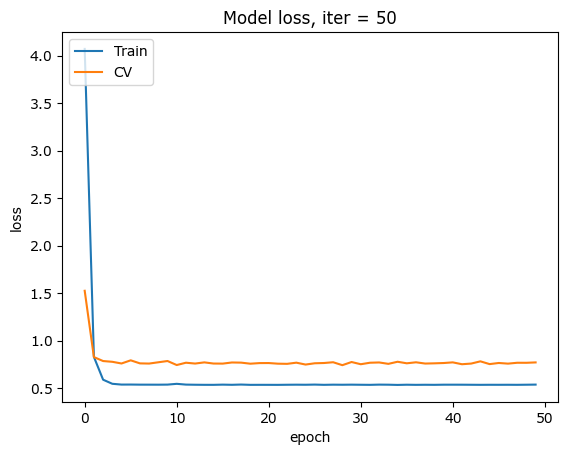

Epoch 1/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7556 - auc: 0.4859 - loss: 5.7883 - sparse_categorical_accuracy: 0.7800 - val_accuracy: 0.5874 - val_auc: 0.6051 - val_loss: 1.4686 - val_sparse_categorical_accuracy: 0.5874
Epoch 2/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - auc: 0.5789 - loss: 0.9768 - sparse_categorical_accuracy: 0.7831 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.8399 - val_sparse_categorical_accuracy: 0.5874
Epoch 3/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - auc: 0.4475 - loss: 0.5878 - sparse_categorical_accuracy: 0.7865 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7740 - val_sparse_categorical_accuracy: 0.5874
Epoch 4/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7595 - auc: 0.4128 - loss: 0.5674 - sparse_categorical_accuracy: 0.7595 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7763 - val_sparse_categorical_accuracy: 0.5874
Epoch 5/75
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

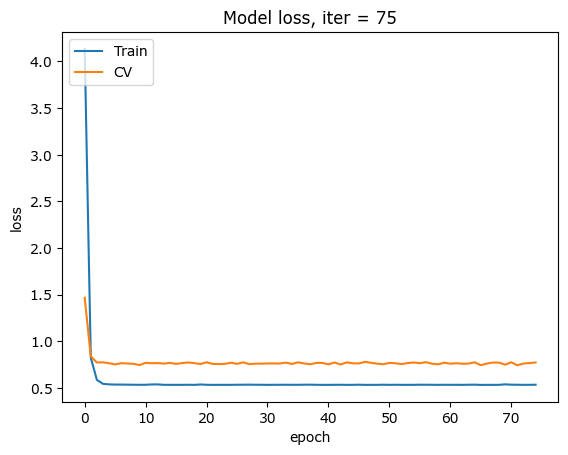

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6887 - auc: 0.4964 - loss: 5.6030 - sparse_categorical_accuracy: 0.7518 - val_accuracy: 0.5874 - val_auc: 0.5199 - val_loss: 1.4360 - val_sparse_categorical_accuracy: 0.5874
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7687 - auc: 0.4984 - loss: 0.9672 - sparse_categorical_accuracy: 0.7687 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.8447 - val_sparse_categorical_accuracy: 0.5874
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7752 - auc: 0.4673 - loss: 0.5985 - sparse_categorical_accuracy: 0.7752 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7865 - val_sparse_categorical_accuracy: 0.5874
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7640 - auc: 0.4964 - loss: 0.5616 - sparse_categorical_accuracy: 0.7640 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7813 - val_sparse_categorical_accuracy: 0.5874
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6

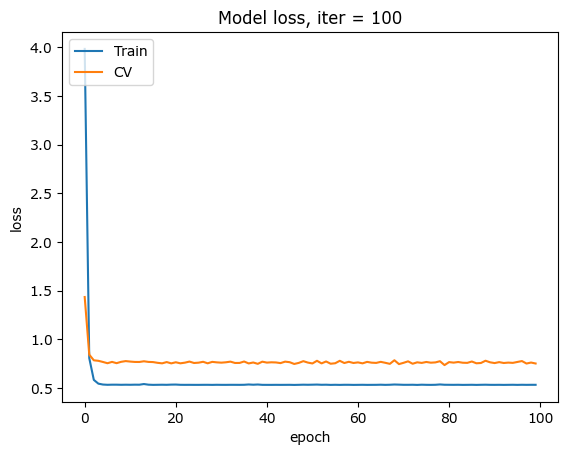

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6755 - auc: 0.5403 - loss: 5.6858 - sparse_categorical_accuracy: 0.7589 - val_accuracy: 0.5874 - val_auc: 0.5080 - val_loss: 1.4108 - val_sparse_categorical_accuracy: 0.5874
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7860 - auc: 0.4847 - loss: 0.9629 - sparse_categorical_accuracy: 0.7860 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.8472 - val_sparse_categorical_accuracy: 0.5874
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7642 - auc: 0.5322 - loss: 0.6112 - sparse_categorical_accuracy: 0.7642 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7823 - val_sparse_categorical_accuracy: 0.5874
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8055 - auc: 0.4477 - loss: 0.5141 - sparse_categorical_accuracy: 0.8055 - val_accuracy: 0.5874 - val_auc: 0.5000 - val_loss: 0.7513 - val_sparse_categorical_accuracy: 0.5874
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6

KeyboardInterrupt: 

In [146]:
iters = [50, 75, 100, 150, 175, 200]
# iters = [100, 200, 300, 400, 500]
models =[None] * len(iters)

for i in range(len(iters)):
    # models[i] = Sequential()
    # models[i].add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07), input_shape=(6,))) 
    # models[i].add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07))) # First layer of 25 units
    # models[i].add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07))) # Second layer of 5 units
    # models[i].add(tf.keras.layers.Dense(1, activation='sigmoid')) # Third layer of 1 units

    models[i] = Sequential([
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(1, activation='sigmoid')
    ])

    models[i].compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=[keras.metrics.SparseCategoricalAccuracy(), 'accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    history = models[i].fit(X_train, y_train, epochs=iters[i], validation_data=(X_cv, y_cv))
    print(history.history['sparse_categorical_accuracy'])
    print(history.history['val_sparse_categorical_accuracy'])
    print("Final accuracy:", history.history['val_accuracy'][-1])
    print("Final AUC:", history.history['val_auc'][-1])

    print(models[i].predict(X_cv[:10]))
    print(y_cv[:10])

    # Visualizing the models[i]'s Loss
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="CV")
    plt.title(f"Model loss, iter = {iters[i]}")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()
